---



---

# **Trabalho II** - Atividade Prática

---



---

# **Tópico I:** CNN

Observe o código abaixo da arquitetura SVM, este código executa a classificação da base de dados MNIST. Note que, ao empregar um pré-processamento dos dados, necessitamos de apenas 25 componentes principais para obter uma acurácia de 98,33%.

In [41]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.layers import MaxPooling2D
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow import keras

# Carregando o conjunto de dados MNIST manualmente
from tensorflow.keras.datasets import mnist

In [42]:
(X, y), (_, _) = mnist.load_data()

# Redimensionando e normalizando os dados
X = X.reshape(-1, 784) / 255.0

# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando PCA para redução de dimensionalidade
n_components = 25  # Número de componentes principais
pca = PCA(n_components=n_components, random_state=42)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Treinando um classificador SVM
svm = SVC(kernel='rbf', C=10)

st = time.time()
svm.fit(x_train_pca, y_train)
et = time.time()
tempo_decorrido = et - st


# Fazendo previsões no conjunto de teste
y_pred = svm.predict(x_test_pca)

# Calculando a acurácia do classificador
accuracy = accuracy_score(y_test, y_pred)
print(' ')

print(f'Acurácia do SVM junto aos dados de teste: {accuracy:.4f}')

 
Acurácia do SVM junto aos dados de teste: 0.9833




---


## **Agora é sua vez:**

1. Proponha uma estrutura de CNN capaz de superar a acurácia obtida via SVM, junto aos dados de teste;
2. Salve, no diretório, seu modelo proposto.

---

In [43]:
# Complete com seu código
(X, y), (_, _) = mnist.load_data()
X = X.reshape(-1, 28, 28, 1) / 255.0

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Treinando um classificador CNN
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
st = time.time()
model.fit(x_train, y_train, epochs=5, validation_split=0.2)
et = time.time()
tempo_decorrido = et - st

Epoch 1/5
1200/1200 [==============================] - 6s 4ms/step - loss: 0.2094 - accuracy: 0.9368 - val_loss: 0.0837 - val_accuracy: 0.9728
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0687 - accuracy: 0.9789 - val_loss: 0.0553 - val_accuracy: 0.9826
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0483 - accuracy: 0.9845 - val_loss: 0.0442 - val_accuracy: 0.9869
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0396 - val_accuracy: 0.9891
Epoch 5/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0267 - accuracy: 0.9911 - val_loss: 0.0435 - val_accuracy: 0.9877


Montamos o modelo com camadas convolucionais, para extração das informações mais importantes.

Max pooling, para ressaltar essas informações mais relevantes, sem perder informações importantes, mantendo o maior valor dentre um conjunto de 4 pixels (2x2) em detrimento dos menores e diminuindo dimensão da imagem.

Adicionamos a camada Flatten para achatar a dimensão de entrada para a camada Dense.

Adicionamos uma primeira camada Dense, totalmente conectada, e uma última camada Dense, destinada a classificação. Como estamos tratando um problema multiclasse em que temos 10 possíveis classificações, utilizamos 10 neurônios de saída.


In [44]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Acurácia do modelo no conjunto de teste: {test_accuracy:.4f}")

375/375 [==============================] - 1s 2ms/step - loss: 0.0390 - accuracy: 0.9881
Acurácia do modelo no conjunto de teste: 0.9881


In [45]:
# Salvar modelo
model.save("model_A.h5")



---



---


# **Tópico II - Transfer Learning:**

Transfer Learning (TL) é uma técnica de aprendizado de máquina onde um modelo pré-treinado em um conjunto de dados é usado como ponto de partida para resolver outra tarefa relacionada. Em vez de treinar um modelo do zero, transferimos o conhecimento adquirido pelo modelo pré-treinado para melhorar o desempenho em uma tarefa específica. Isso economiza tempo e recursos de treinamento, pois o modelo já aprendeu características gerais úteis em sua tarefa anterior e pode adaptá-las para a nova tarefa, tornando-a mais eficiente e eficaz.

---

## **Agora é sua vez:**

Aplique a técnica Transfer Learning (TL) para a versão binária do problema de classificação MNIST. Note que, o problema do tópico I possuía 10 classes. No entanto, para o tópico II, você terá que converter o problema do tópico I para um problema binário e resolver esse problema binário via TL.

1. Carregue seu modelo (salvo no tópico I) capaz de executar a classificação multiclasse para a base de dados MNIST;

2. Faça alterações necessárias de forma que seja possível resolver a versão binária de classificação para a base de dados MNIST (classe 0 para digitos de 0 a 4, classe 1 para digitos de 5 a 9) **via TL**;

3. Obtenha a acurácia do modelo final junto aos dados de teste (neste problema binário).

**Dica:** é possível obter resultados interessantes usando a softMax na versão final do modelo.

---

In [46]:
x_train.shape

(48000, 28, 28, 1)

In [47]:
y_train.shape

(48000,)

In [48]:
y_test_binary

array([1, 0, 1, ..., 1, 1, 0])

In [78]:
# Complete com seu código

model_A = keras.models.load_model("model_A.h5")

model_B_on_A = keras.models.Sequential(model_A.layers[:-1])

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
model_B_on_A.add(tf.keras.layers.Dropout(0.5))
model_B_on_A.add(tf.keras.layers.Flatten())
model_B_on_A.add(tf.keras.layers.Dense(128, activation='relu'))
model_B_on_A.add(tf.keras.layers.Dropout(0.5))
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

model_B_on_A.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convertendo o problema em uma classificação binária
y_train_binary = (y_train >= 5).astype('int')  # Classes 0 para digitos de 0 a 4, Classes 1 para digitos de 5 a 9
y_test_binary = (y_test >= 5).astype('int')

In [50]:
model_A.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 1600)              0         
                                                                 
 dense_70 (Dense)            (None, 32)               

In [51]:
model_B_on_A.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 1600)              0         
                                                                 
 dense_70 (Dense)            (None, 32)               

Fizemos alguns testes e sem adicionar camadas Drop out, o modelo ficou com overfitting.
Além disso adicionamos uma camada flatten e uma densa, e por último uma camada de saída densa. Por ser um problema de classificação binária, a última camada (a de classificação) deve ter apenas 1 neurônio de saída.

In [79]:
history = model_B_on_A.fit(x_train, y_train_binary, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1458 - accuracy: 0.9441
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0602 - accuracy: 0.9765
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0535 - accuracy: 0.9796


Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0500 - accuracy: 0.9817 - val_loss: 0.0265 - val_accuracy: 0.9909
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0424 - accuracy: 0.9833 - val_loss: 0.0263 - val_accuracy: 0.9906
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0387 - accuracy: 0.9848 - val_loss: 0.0256 - val_accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0334 - accuracy: 0.9872 - val_loss: 0.0230 - val_accuracy: 0.9912
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0315 - accuracy: 0.9878 - val_loss: 0.0212 - val_accuracy: 0.9922


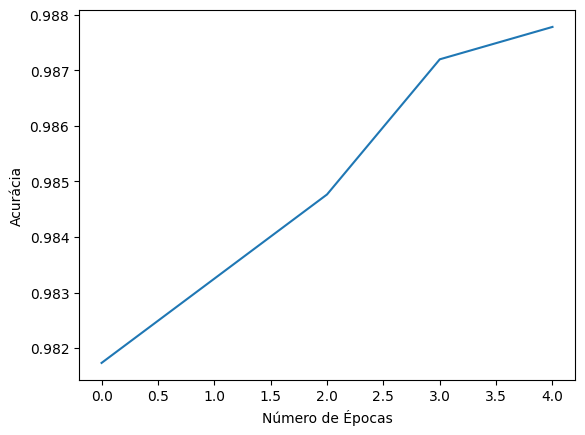

In [80]:
for layer in model_B_on_A.layers:
    layer.trainable = True

model_B_on_A.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
historico = model_B_on_A.fit(x_train, y_train_binary, epochs=5, validation_data=(x_test, y_test_binary))
historico.history.keys()

import matplotlib.pyplot as plt
plt.plot(historico.history['accuracy']);

plt.xlabel("Número de Épocas")
plt.ylabel("Acurácia")

plt.show()

Com o gráfico acima vemos que conforme o número de épocas aumenta, é progressiva a curva de aprendizagem da rede, não fica estagnada e chega a um resultado bom.
Um ponto de atenção com esse modelo é que por conta da acurácia ser tão alta, é preciso tomar cuidado com overfitting.

In [81]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model_B_on_A.evaluate(x_test, y_test_binary)
print(f"Acurácia do modelo no conjunto de teste: {test_accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0212 - accuracy: 0.9922
Acurácia do modelo no conjunto de teste: 0.9922


**Implementação com softmax na última camada**

In [75]:
# Complete com seu código

model_A = keras.models.load_model("model_A.h5")

model_B_on_A_softmax = keras.models.Sequential(model_A.layers[:-1])

for layer in model_B_on_A_softmax.layers[:-1]:
    layer.trainable = False
model_B_on_A_softmax.add(tf.keras.layers.Dropout(0.5))
model_B_on_A_softmax.add(tf.keras.layers.Flatten())
model_B_on_A_softmax.add(tf.keras.layers.Dense(128, activation='relu'))
model_B_on_A_softmax.add(tf.keras.layers.Dropout(0.5))
model_B_on_A_softmax.add(keras.layers.Dense(1, activation="softmax"))

model_B_on_A_softmax.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convertendo o problema em uma classificação binária
y_train_binary = (y_train >= 5).astype('int')  # Classes 0 para digitos de 0 a 4, Classes 1 para digitos de 5 a 9
y_test_binary = (y_test >= 5).astype('int')

In [56]:
model_B_on_A_softmax.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 1600)              0         
                                                                 
 dense_70 (Dense)            (None, 32)               

In [57]:
history = model_B_on_A_softmax.fit(x_train, y_train_binary, epochs=3)

Epoch 1/3
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1824 - accuracy: 0.4890
Epoch 2/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0632 - accuracy: 0.4890
Epoch 3/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.4890


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1455 - accuracy: 0.4901 - val_loss: 0.0329 - val_accuracy: 0.4861
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0596 - accuracy: 0.4901 - val_loss: 0.0266 - val_accuracy: 0.4861
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0498 - accuracy: 0.4901 - val_loss: 0.0278 - val_accuracy: 0.4861
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0459 - accuracy: 0.4901 - val_loss: 0.0276 - val_accuracy: 0.4861
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0417 - accuracy: 0.4901 - val_loss: 0.0237 - val_accuracy: 0.4861


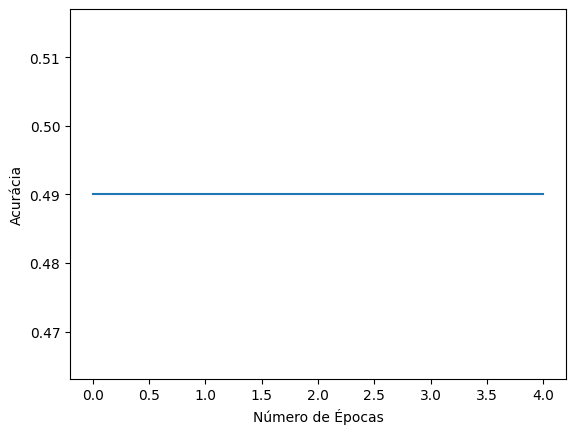

In [76]:
for layer in model_B_on_A.layers:
    layer.trainable = True

model_B_on_A_softmax.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
historico = model_B_on_A_softmax.fit(x_train, y_train_binary, epochs=5, validation_data=(x_test, y_test_binary))
historico.history.keys()

import matplotlib.pyplot as plt
plt.plot(historico.history['accuracy']);

plt.xlabel("Número de Épocas")
plt.ylabel("Acurácia")

plt.show()

Fizemos uma segunda implementação de solução para o problema proposto para estudar a diferença de performance entre uma camada softmax e sigmoide para um problema binário. Com base nas acurácias e perdas em cada época e no gráfico acima, notamos que a rede ficou estagnada em uma acurácia muito baixa (49%), sendo superada pela solução que utiliza a função sigmoide na camada de saída.

Isso pode ser explicado pelo funcionamento da função softmax.
A função sigmoide oferece um valor em um intervalo entre 0 e 1, representando a confiança/probabilidade da entrada ser 0 ou 1.
Já a softmax calcula a probabilidade da entrada se encaixar em cada uma das classes, sendo melhor para estudar a relação entre mais classes.

In [77]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model_B_on_A_softmax.evaluate(x_test, y_test_binary)
print(f"Acurácia do modelo no conjunto de teste: {test_accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0237 - accuracy: 0.4861
Acurácia do modelo no conjunto de teste: 0.4861


**Conclusão**

Com os resultados obtidos provamos que a performance sigmoid  supera a performance do modelo que utiliza softmax como função de saída na última camada. Isso acontece porque a função sigmoid é mais adequada para modelos de classificação binária, enquanto a softmax é melhor para classificação multi-classe.
Além disso utilizamos camadas Drop out para minimizar chance de overfitting, visto que a acurácia final do modelo final (que utiliza sigmoid) foi 99.38%.



---



---


# **Tópico III:** Autoencoder

Abaixo, dois gráficos representam duas situações: I) Pouca Separabilidade e II) Separabilidade Maximizada entre as classes.

#### I) Pouca Separabilidade Entre as Classes:

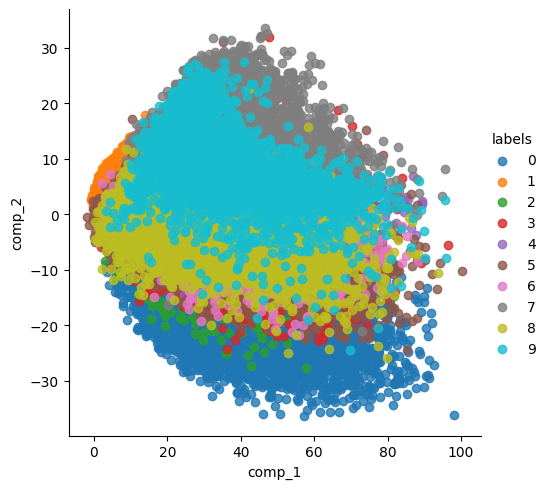


#### II) Separabilidade Maximizada Entre as Classes:

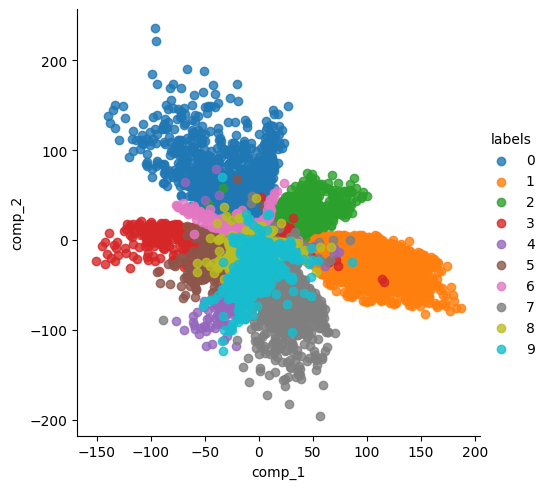

#### O código abaixo apresenta uma estrutura do tipo autoencoder com **pouca separabilidade** entre as classes:

In [60]:
# Suprime avisos para manter a saída mais limpa.
import warnings
warnings.filterwarnings('ignore')

# Importa as bibliotecas TensorFlow e Keras.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten

# Carrega o conjunto de dados MNIST.
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normaliza os valores dos pixels para o intervalo [0, 1].
x_train, x_test = x_train / 255.0, x_test / 255.0

# Redimensiona as imagens de treinamento para terem a forma original (28x28).
x_images = x_train.reshape(x_train.shape[0], 28, 28)

In [61]:
# Define uma camada de entrada para a rede neural autoencoder com forma (28, 28, 1).
input_img = Input(shape=(28, 28, 1))

# Camadas de codificação (encoder):
# - A primeira camada densa com 512 unidades e ativação 'tanh'.
encoded = Dense(512, activation='tanh')(input_img)
# - A segunda camada densa com 128 unidades e ativação 'tanh'.
encoded = Dense(128, activation='tanh')(encoded)
# - A terceira camada densa com 32 unidades e ativação 'tanh'.
encoded = Dense(32, activation='tanh')(encoded)

# A camada Flatten 'aplanou' a saída do encoder para uma única dimensão.
encoded = Flatten()(encoded)

# Camadas de decodificação (decoder):
# - A primeira camada densa com 2 unidades (usado para redução de dimensionalidade).
encoded = Dense(2)(encoded)
# - A primeira camada densa com 32 unidades e ativação 'tanh'.
decoded = Dense(32, activation='tanh')(encoded)
# - A segunda camada densa com 128 unidades e ativação 'tanh'.
decoded = Dense(128, activation='tanh')(decoded)
# - A terceira camada densa com 512 unidades e ativação 'tanh'.
decoded = Dense(512, activation='tanh')(decoded)

# A camada de saída com 784 unidades e ativação 'sigmoid' para reconstruir a imagem.
decoded = Dense(784, activation='sigmoid')(decoded)

# Cria o modelo autoencoder que mapeia da entrada para a saída.
autoencoder = Model(inputs=input_img, outputs=decoded)

In [62]:
autoencoder.compile(optimizer="adam", loss="mse")

# Redimensiona os dados de treinamento para as formas necessárias.
# - X_train_1 é uma cópia dos dados de treinamento com a forma (amostras, 28, 28, 1).
x_train_1 = x_train.reshape(x_train.shape[0], 28, 28, 1)
# - X_train_2 é uma cópia dos dados de treinamento com a forma (amostras, 784).
x_train_2 = x_train.reshape(x_train.shape[0], 784)

# Treina o modelo autoencoder usando os dados de entrada X_train_1 e as metas X_train_2.
# - 'epochs' define o número de épocas de treinamento.
# - 'verbose' controla a quantidade de informações exibidas durante o treinamento (1 para detalhes, 0 para silencioso).
history = autoencoder.fit(x_train_1, x_train_2, epochs=2, verbose=1)

Epoch 1/2
1875/1875 [==============================] - 21s 10ms/step - loss: 0.0556
Epoch 2/2
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0501


In [63]:
# Cria um modelo separado para o encoder, usando a camada de entrada 'input_img' e a saída 'encoded'.
encoder = Model(inputs=input_img, outputs=encoded)

1875/1875 [==============================] - 7s 4ms/step


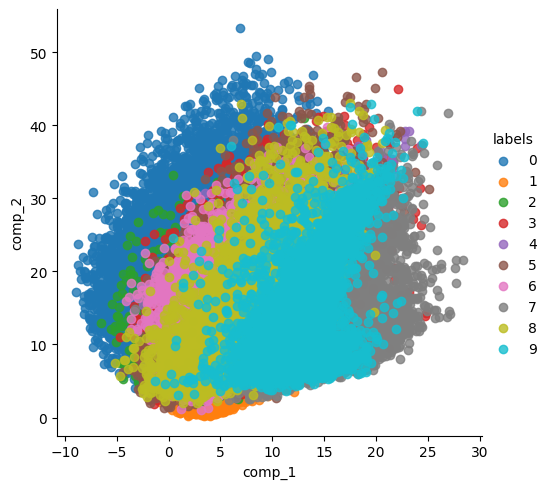

In [64]:
# Importa as bibliotecas seaborn (para visualização estatística) e pandas (para manipulação de dados).
import seaborn as sns
import pandas as pd

# Usa o encoder para projetar os dados de treinamento X_train_1 nos componentes latentes.
x_proj = encoder.predict(x_train_1[:60000])

# Exibe a forma do conjunto de dados projetado.
x_proj.shape

# Cria um DataFrame pandas chamado 'proj' para armazenar os componentes latentes.
proj = pd.DataFrame(x_proj)

# Nomeia as colunas do DataFrame como "comp_1" e "comp_2" para representar os componentes latentes.
proj.columns = ["comp_1", "comp_2"]

# Adiciona uma coluna chamada "labels" ao DataFrame para armazenar as etiquetas (rótulos) dos dados.
proj["labels"] = y_train[:60000]

# Cria um gráfico de dispersão (scatter plot) usando seaborn para visualizar os componentes latentes.
sns.lmplot(x="comp_1", y="comp_2", hue="labels", data=proj, fit_reg=False)



---

## **Agora é sua vez:**

- Faça alterações na estrutura fornecida (ou proponha uma estrutura autoencoder) de forma que a separabilidade entre as classes, na base de dados MNIST, seja maximizada;

- Plote seu resultado mostrando a separabilidade entre as classes.

---


In [65]:
# Complete com seu código

# Define uma camada de entrada para a rede neural autoencoder com forma (28, 28, 1).
input_img = Input(shape=(28, 28, 1))

# Camadas de codificação (encoder):
# - A primeira camada densa com 512 unidades e ativação 'tanh'.
#encoded_2 = Dense(512, activation='tanh')(input_img)
# - A segunda camada densa com 128 unidades e ativação 'tanh'.
#encoded_2 = Dense(128, activation='tanh')(encoded_2)
# - A terceira camada densa com 32 unidades e ativação 'tanh'.
#encoded_2 = Dense(32, activation='tanh')(encoded_2)

# A camada Flatten 'aplanou' a saída do encoder para uma única dimensão.
#encoded_2 = Flatten()(encoded_2)

encoded_2 = (Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))(input_img)
encoded_2 = (MaxPooling2D((2, 2)))(encoded_2)
encoded_2 = (Conv2D(64, (3, 3), activation='relu'))(encoded_2)
encoded_2 = (MaxPooling2D((2, 2)))(encoded_2)
encoded_2 = (Conv2D(64, (3, 3), activation='relu'))(encoded_2)
encoded_2 = (MaxPooling2D((2, 2)))(encoded_2)
encoded_2 = (Flatten())(encoded_2)
encoded_2 = (Dense(32, activation='relu'))(encoded_2)

# Camadas de decodificação (decoder):
# - A primeira camada densa com 2 unidades (usado para redução de dimensionalidade).
encoded_2 = Dense(2)(encoded_2)
# - A primeira camada densa com 32 unidades e ativação 'tanh'.
decoded_2 = Dense(32, activation='tanh')(encoded_2)
# - A segunda camada densa com 128 unidades e ativação 'tanh'.
decoded_2 = Dense(128, activation='tanh')(decoded_2)
# - A terceira camada densa com 512 unidades e ativação 'tanh'.
decoded_2 = Dense(512, activation='tanh')(decoded_2)

# A camada de saída com 784 unidades e ativação 'sigmoid' para reconstruir a imagem.
decoded_2 = Dense(784, activation='sigmoid')(decoded_2)

# Cria o modelo autoencoder que mapeia da entrada para a saída.
autoencoder_2 = Model(inputs=input_img, outputs=decoded_2)

autoencoder_2.compile(optimizer="adam", loss="mse")

# Redimensiona os dados de treinamento para as formas necessárias.
# - X_train_1 é uma cópia dos dados de treinamento com a forma (amostras, 28, 28, 1).
#x_train_1 = x_train.reshape(x_train.shape[0], 28, 28, 1)
# - X_train_2 é uma cópia dos dados de treinamento com a forma (amostras, 784).
#x_train_2 = x_train.reshape(x_train.shape[0], 784)

# Treina o modelo autoencoder usando os dados de entrada X_train_1 e as metas X_train_2.
# - 'epochs' define o número de épocas de treinamento.
# - 'verbose' controla a quantidade de informações exibidas durante o treinamento (1 para detalhes, 0 para silencioso).
history = autoencoder_2.fit(x_train_1, x_train_2, epochs=2, verbose=1)

encoder_2 = Model(inputs=input_img, outputs=encoded_2)

Epoch 1/2
1875/1875 [==============================] - 12s 5ms/step - loss: 0.0557
Epoch 2/2
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0471


#### Plot bidimensional com a separabilidade entre as classes:

1875/1875 [==============================] - 4s 2ms/step


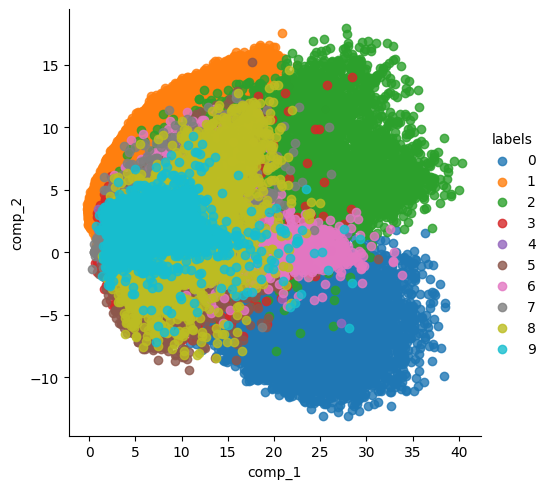

In [66]:
# Complete com seu código
# Importa as bibliotecas seaborn (para visualização estatística) e pandas (para manipulação de dados).
import seaborn as sns
import pandas as pd

# Usa o encoder para projetar os dados de treinamento X_train_1 nos componentes latentes.
x_proj = encoder_2.predict(x_train_1[:60000])

# Exibe a forma do conjunto de dados projetado.
x_proj.shape

# Cria um DataFrame pandas chamado 'proj' para armazenar os componentes latentes.
proj = pd.DataFrame(x_proj)

# Nomeia as colunas do DataFrame como "comp_1" e "comp_2" para representar os componentes latentes.
proj.columns = ["comp_1", "comp_2"]

# Adiciona uma coluna chamada "labels" ao DataFrame para armazenar as etiquetas (rótulos) dos dados.
proj["labels"] = y_train[:60000]

# Cria um gráfico de dispersão (scatter plot) usando seaborn para visualizar os componentes latentes.
sns.lmplot(x="comp_1", y="comp_2", hue="labels", data=proj, fit_reg=False)

Mudanças feitas

Adicionamos camadas convolucionais e max pooling no encoder.
O gráfico final mostra as classes um pouco mais separadas. Ainda há espaço para melhorias, mas isso é um avanço.